<span style="text-decoration: underline; font-size: 26pt;">Cyber security attack Using Anomaly Scores</span>
<h5><ul>- Group No      : 78</ul>
    <ul>- Himosh R.     : EG/2020/3967</ul>
    <ul>- Shathursan R. : EG/2020/4216</ul>
</h5>


In [441]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [442]:
# df = dataframe
df=pd.read_csv('cybersecurity_attacks.csv')
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [444]:
df.info() #find out the non-null values and data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [445]:
# Find number of Unique values
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Timestamp,39997
Source IP Address,40000
Destination IP Address,40000
Source Port,29761
Destination Port,29895
Protocol,3
Packet Length,1437
Packet Type,2
Traffic Type,3
Payload Data,40000


<span style="text-decoration: underline; font-size: 20pt;">Data analyzing</span>


In [446]:
# Saperate month and weekday from Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df['Month'] = df['Timestamp'].dt.month
df['weekday_name'] = df['Timestamp'].dt.day_name()
print(df[['Timestamp','Month','weekday_name']])


                Timestamp  Month weekday_name
0     2023-05-30 06:33:58      5      Tuesday
1     2020-08-26 07:08:30      8    Wednesday
2     2022-11-13 08:23:25     11       Sunday
3     2023-07-02 10:38:46      7       Sunday
4     2023-07-16 13:11:07      7       Sunday
...                   ...    ...          ...
39995 2023-05-26 14:08:42      5       Friday
39996 2023-03-27 00:38:27      3       Monday
39997 2022-03-31 01:45:49      3     Thursday
39998 2023-09-22 18:32:38      9       Friday
39999 2023-10-10 11:59:52     10      Tuesday

[40000 rows x 3 columns]


Text(0.5, 1.0, 'Monthly IoC Detected from 2020 to 2023 ')

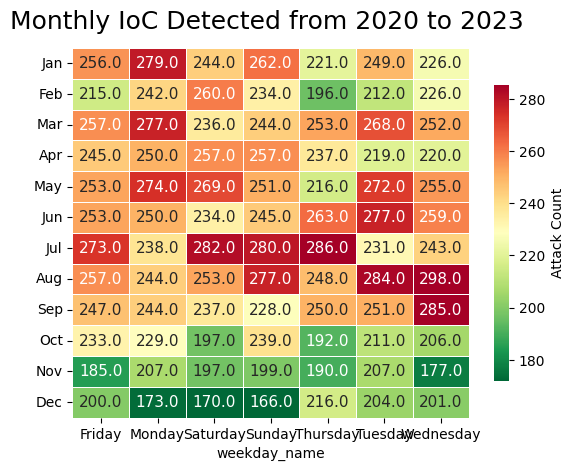

In [447]:
# Heatmap for year vs month (Number of Malware Indicators)
import calendar
detected = df['Malware Indicators'] == 'IoC Detected'

all_month_year_df = pd.pivot_table(df[detected], values='Malware Indicators',
                                   index=["Month"],
                                   columns=["weekday_name"],
                                   fill_value=0,
                                   aggfunc="count"
                                   )

named_index = [[calendar.month_abbr[i] 
                if isinstance(i, int) else i for i in list(all_month_year_df.index)]]  
all_month_year_df = all_month_year_df.set_index(named_index)

ax = sns.heatmap(all_month_year_df, cmap='RdYlGn_r',
                 robust=True,
                 fmt='.1f',
                 annot=True,
                 linewidths=.5,
                 annot_kws={'size':11},
                 cbar_kws={'shrink':.8,
                           'label':'Attack Count'})                       
    

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Monthly IoC Detected from 2020 to 2023 ', fontdict={'fontsize':18},    pad=14)


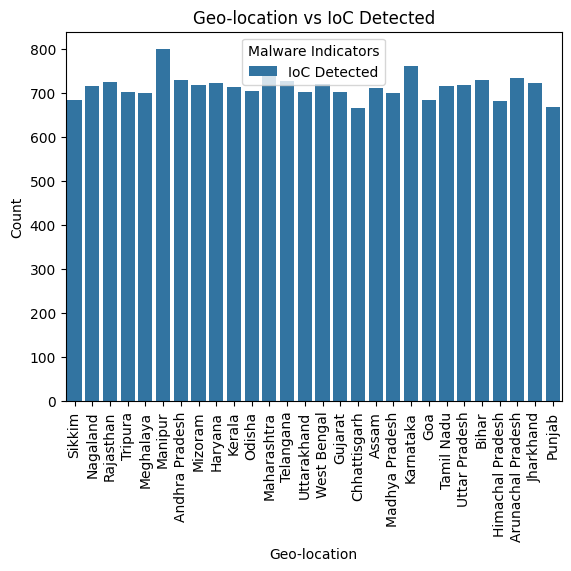

In [448]:
# Split the geo-location data by district only
df['Geo-location'] = df['Geo-location Data'].str.split(',').str[1].str.strip()
unique_geo_locations = df['Geo-location'].unique()

sns.countplot(data=df, x='Geo-location', hue='Malware Indicators')
plt.xlabel('Geo-location')
plt.ylabel('Count')
plt.title('Geo-location vs IoC Detected')
plt.xticks(rotation=90)
plt.show()

In [449]:
# Saperate Data from Device browser
df['Device browser'] = 'Other'  
mozilla_mask = df['Device Information'].str.contains('Mozilla', case=False, na=False)
opera_mask = df['Device Information'].str.contains('Opera', case=False, na=False)
df.loc[mozilla_mask, 'Device browser'] = 'Mozilla'
df.loc[opera_mask, 'Device browser'] = 'Opera'
df["Device browser"].value_counts()


Device browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64

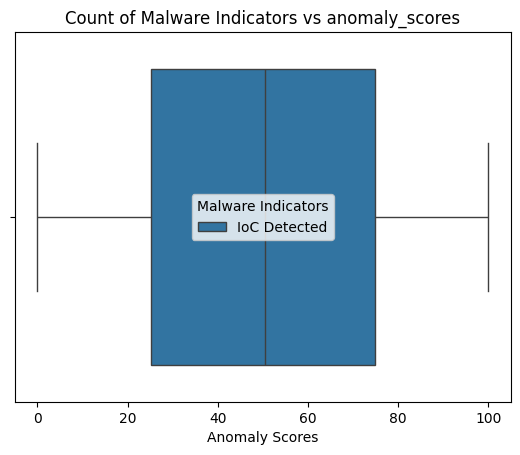

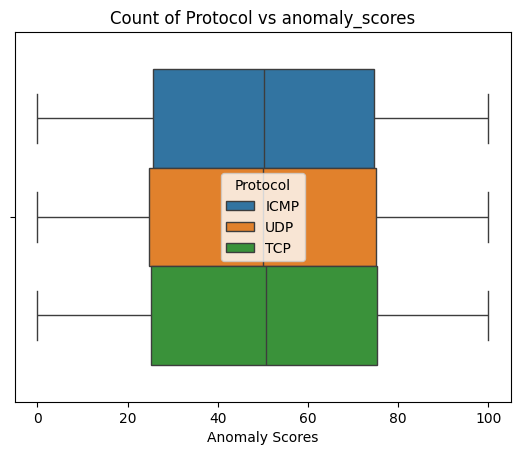

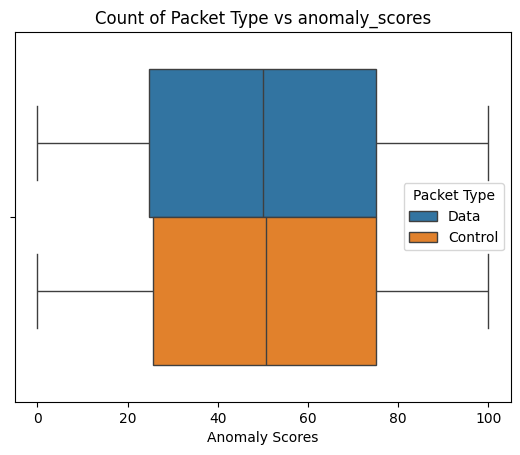

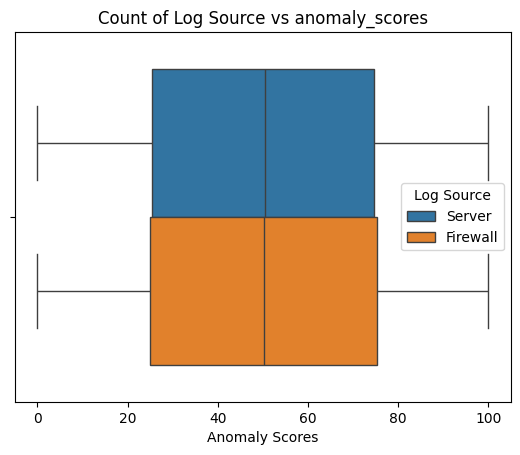

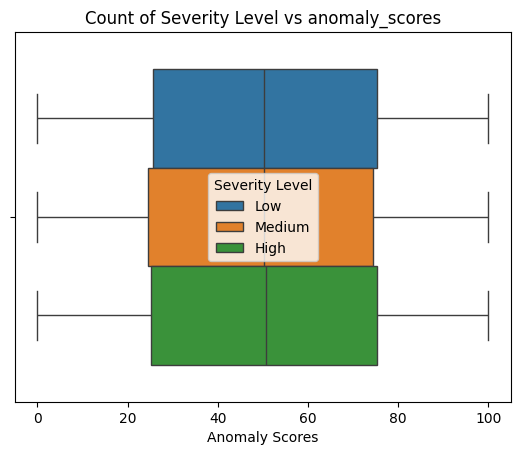

In [450]:
# Analyzing the selected column's variations with anomaly scores
selected_columns = ['Malware Indicators', 'Protocol', 'Packet Type', 'Log Source', 'Severity Level']

for col in selected_columns:
    sns.boxplot(data=df, x='Anomaly Scores', hue=col)
    plt.title(f'Count of {col} vs anomaly_scores')
    plt.show()

In [451]:
df['Anomaly Scores'].describe()

count    40000.000000
mean        50.113473
std         28.853598
min          0.000000
25%         25.150000
50%         50.345000
75%         75.030000
max        100.000000
Name: Anomaly Scores, dtype: float64

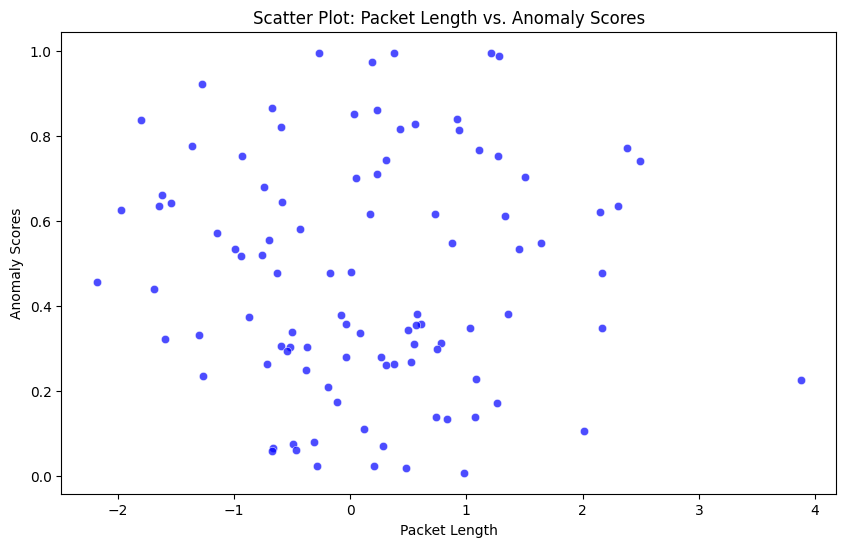

In [452]:
# plot scatter plot to analyze the relationship between packet length and anomaly scores
packet_length = np.random.normal(size=100)
anomaly_scores = np.random.uniform(low=0, high=1, size=100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=packet_length, y=anomaly_scores, color='blue', alpha=0.7)
plt.title('Scatter Plot: Packet Length vs. Anomaly Scores')
plt.xlabel('Packet Length')
plt.ylabel('Anomaly Scores')
plt.show()



<span style="text-decoration: underline; font-size: 20pt;">Data preprocessing</span>



In [453]:
# For missing values:
    # Malware indicators alerts/warnings and IDS/IPS alerts columns contain some null values.
    # To address this, fill the remaining null cells in these columns with opposite values.

df['Malware Indicators'].fillna('IoC Undetected', inplace=True)
df['Alerts/Warnings'].fillna('Alert not triggered', inplace=True)
df['IDS/IPS Alerts'].fillna('No Alerts', inplace=True)


In [454]:
# MinMaxScalling 
# Apply MinMaxScaler to anomaly scores and Month.
from sklearn.preprocessing import MinMaxScaler
anomaly_scores_column = df['Anomaly Scores'].values.reshape(-1, 1)
scaler = MinMaxScaler()

df['Anomaly Scores Normalized'] = scaler.fit_transform(anomaly_scores_column)
df['Anomaly Scores Normalized'].describe()

# Does not need to normalize month. because it is already in range of 1-12

# Month_column = df['Month'].values.reshape(-1, 1)
# scaler = MinMaxScaler()
# df['Month Normalized'] = scaler.fit_transform(Month_column)
# df['Month Normalized'].describe()


count    40000.000000
mean         0.501135
std          0.288536
min          0.000000
25%          0.251500
50%          0.503450
75%          0.750300
max          1.000000
Name: Anomaly Scores Normalized, dtype: float64

In [455]:
# Set anomaly scores to high and low thresholds ().
df['Anomaly Scores Normalized'] = df['Anomaly Scores Normalized'].apply(lambda x: 'low' if x < 0.1 else 'high')


In [456]:
# Drop unwanted column
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Month', 'weekday_name', 'Geo-location', 'Device browser',
       'Anomaly Scores Normalized'],
      dtype='object')

In [457]:
drop_Unwanted_column=[
                        'Timestamp', 
                        'Source IP Address',
                        'Destination IP Address',
                        'Source Port', 
                        'Destination Port', 
                        # 'Protocol', 
                        'Packet Length',
                        'Packet Type',
                        'Traffic Type', 
                        'Payload Data', 
                        # 'Malware Indicators',
                        'Anomaly Scores', 
                        'Alerts/Warnings', 
                        # 'Attack Type', 
                        'Attack Signature',
                        'Action Taken', 
                        'Severity Level', 
                        'User Information',
                        'Device Information', 
                        'Network Segment', 
                        'Geo-location Data',
                        'Proxy Information',
                        'Firewall Logs', 
                        # 'IDS/IPS Alerts', 
                        'Log Source',
                        # 'Month', 
                        # 'weekday_name' ,
                        'Geo-location', 
                        # 'Anomaly Scores Normalized'
                        #  'Month Normalized'
                        # 'Device browser'
                        ]
df.drop(columns=drop_Unwanted_column, inplace=True)

<span style="text-decoration: underline; font-size: 20pt;">Devide data set to numeric and categorical</span>

In [458]:
# Print the numeric data columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()
print(df[numeric_cols].describe())



              Month
count  40000.000000
mean       6.288275
std        3.332979
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000


In [459]:
#  print the categorical data columns
print(df[categorical_cols].describe())

       Protocol Malware Indicators Attack Type IDS/IPS Alerts weekday_name  \
count     40000              40000       40000          40000        40000   
unique        3                  2           3              2            7   
top        ICMP       IoC Detected        DDoS      No Alerts      Tuesday   
freq      13429              20000       13428          20050         5813   

       Device browser Anomaly Scores Normalized  
count           40000                     40000  
unique              2                         2  
top           Mozilla                      high  
freq            31951                     36007  


In [460]:
df.describe(include='object')

,Protocol,Malware Indicators,Attack Type,IDS/IPS Alerts,weekday_name,Device browser,Anomaly Scores Normalized
count,40000,40000,40000,40000,40000,40000,40000
unique,3,2,3,2,7,2,2
top,ICMP,IoC Detected,DDoS,No Alerts,Tuesday,Mozilla,high
freq,13429,20000,13428,20050,5813,31951,36007


In [461]:
df[categorical_cols+numeric_cols].head()

,Protocol,Malware Indicators,Attack Type,IDS/IPS Alerts,weekday_name,Device browser,Anomaly Scores Normalized,Month
0,ICMP,IoC Detected,Malware,No Alerts,Tuesday,Mozilla,high,5
1,ICMP,IoC Detected,Malware,No Alerts,Wednesday,Mozilla,high,8
2,UDP,IoC Detected,DDoS,Alert Data,Sunday,Mozilla,high,11
3,UDP,IoC Undetected,Malware,Alert Data,Sunday,Mozilla,high,7
4,TCP,IoC Undetected,DDoS,Alert Data,Sunday,Mozilla,low,7


<span style="text-decoration: underline; font-size: 20pt;">Encoding Categorical Data(OneHotEncoder)</span>

In [462]:
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse


encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df[categorical_cols])
df_encoded = pd.concat([df.drop(columns=categorical_cols), pd.DataFrame.sparse.from_spmatrix(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

df_encoded.head()


,Month,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Malware Indicators_IoC Detected,Malware Indicators_IoC Undetected,Attack Type_DDoS,Attack Type_Intrusion,Attack Type_Malware,IDS/IPS Alerts_Alert Data,...,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday,Device browser_Mozilla,Device browser_Opera,Anomaly Scores Normalized_high,Anomaly Scores Normalized_low
0,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,11,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,7,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [463]:
# Y = Anomaly Scores Normalized_high
# X = All columns except Anomaly Scores
columns_to_drop = ['Anomaly Scores Normalized_low'] 
columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]
df_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)

Y = df_encoded['Anomaly Scores Normalized_high']
X = df_encoded.drop(['Anomaly Scores Normalized_high'], axis=1) #, 'Alerts/Warnings_Alert Triggered'


In [464]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size=0.8, 
                                                    random_state=1)

<span style="text-decoration: underline; font-size: 20pt;">LogisticRegression</span>


In [465]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression()

In [466]:
accuracy = logreg.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.901625


c:\Python310\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


<span style="text-decoration: underline; font-size: 20pt;">DecisionTreeClassifier</span>


In [467]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)


c:\Python310\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


DecisionTreeClassifier()

In [468]:
Y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.88325


c:\Python310\lib\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
